In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_table('GRACE/PAPER/Paper_Data/Hists/FitFRAP_mmh1/params.dat', names = ["a1", "a2","a3","a4","a5","a6","a7","n1","n2","t_half","v_max","mmh1"])
df1 = pd.read_table('GRACE/PAPER/Paper_Data/Hists/FitFRAP_mmh2/params.dat', names = ["a1", "a2","a3","a4","a5","a6","a7","n1","n2","t_half","v_max","mmh2"])
df2 = pd.read_table('GRACE/PAPER/Paper_Data/Hists/FitFRAP_mmh3/params.dat', names = ["a1", "a2","a3","a4","a5","a6","a7","n1","n2","t_half","v_max","mmh3"])


In [4]:
params = pd.concat([df, df1, df2])

In [5]:
params = params.fillna(0)

In [6]:
params.sample(5)

,a1,a2,a3,a4,a5,a6,a7,n1,n2,t_half,v_max,mmh1,mmh2,mmh3
14,0.681765,0.633344,0.967524,1.051831e+15,4.044821e+24,0.081240,9.436305e-02,1.047497,1.067696,13.294734,1.264895,0.0,1.0,0.0
79,0.562623,0.748636,0.985674,9.397228e-01,4.569414e+00,0.002268,8.889503e-07,1.084834,1.009124,9.215724,1.091073,1.0,0.0,0.0
106,0.669802,0.928484,1.302481,3.377055e+01,3.376668e+11,0.041868,4.787927e-02,1.052315,1.042761,8.843336,1.168793,0.0,1.0,0.0
7,0.585715,0.702057,1.001900,8.930460e+10,8.508333e+00,0.005798,4.490210e-03,1.095589,1.042117,10.979814,1.186867,0.0,1.0,0.0
70,0.462960,0.855398,2.826795,7.898564e-01,4.128971e-01,0.002132,6.495941e-05,1.144339,1.284010,9.549495,1.222980,0.0,1.0,0.0


In [7]:
params["mmh1"] = params["mmh1"]+2*params["mmh2"]+3*params["mmh3"]
params = params[params.columns[0:12]]
params["mmh1"] = params["mmh1"].astype(int)

In [8]:
params.sample(5)

,a1,a2,a3,a4,a5,a6,a7,n1,n2,t_half,v_max,mmh1
105,0.708604,0.629065,0.721825,7.421329e+14,1.130027e+20,0.018628,0.019069,1.034251,0.961795,11.422726,1.128957,2
25,0.444633,0.300035,1.010087,3.567725e-01,2.154338e-01,0.029643,0.031817,1.118187,1.192077,22.119487,1.087280,3
19,0.669558,0.551570,0.735659,1.889555e+14,1.361035e+38,0.036549,0.041395,1.052461,1.012713,13.940275,1.213989,2
11,0.670590,0.668144,0.902423,3.347031e+01,4.004241e+01,0.009553,0.008744,1.052238,1.023065,11.313967,1.170476,2
55,0.578254,0.509647,1.152469,1.016687e+12,5.069558e-01,0.012939,0.012978,1.100480,1.154269,14.053571,1.168420,1


In [9]:
params['n1-n2'] = params ['n1'] - params['n2']

In [10]:
params.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 0 to 63
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a1      290 non-null    float64
 1   a2      290 non-null    float64
 2   a3      290 non-null    float64
 3   a4      290 non-null    float64
 4   a5      290 non-null    float64
 5   a6      290 non-null    float64
 6   a7      290 non-null    float64
 7   n1      290 non-null    float64
 8   n2      290 non-null    float64
 9   t_half  290 non-null    float64
 10  v_max   290 non-null    float64
 11  mmh1    290 non-null    int32  
 12  n1-n2   290 non-null    float64
dtypes: float64(12), int32(1)
memory usage: 30.6 KB


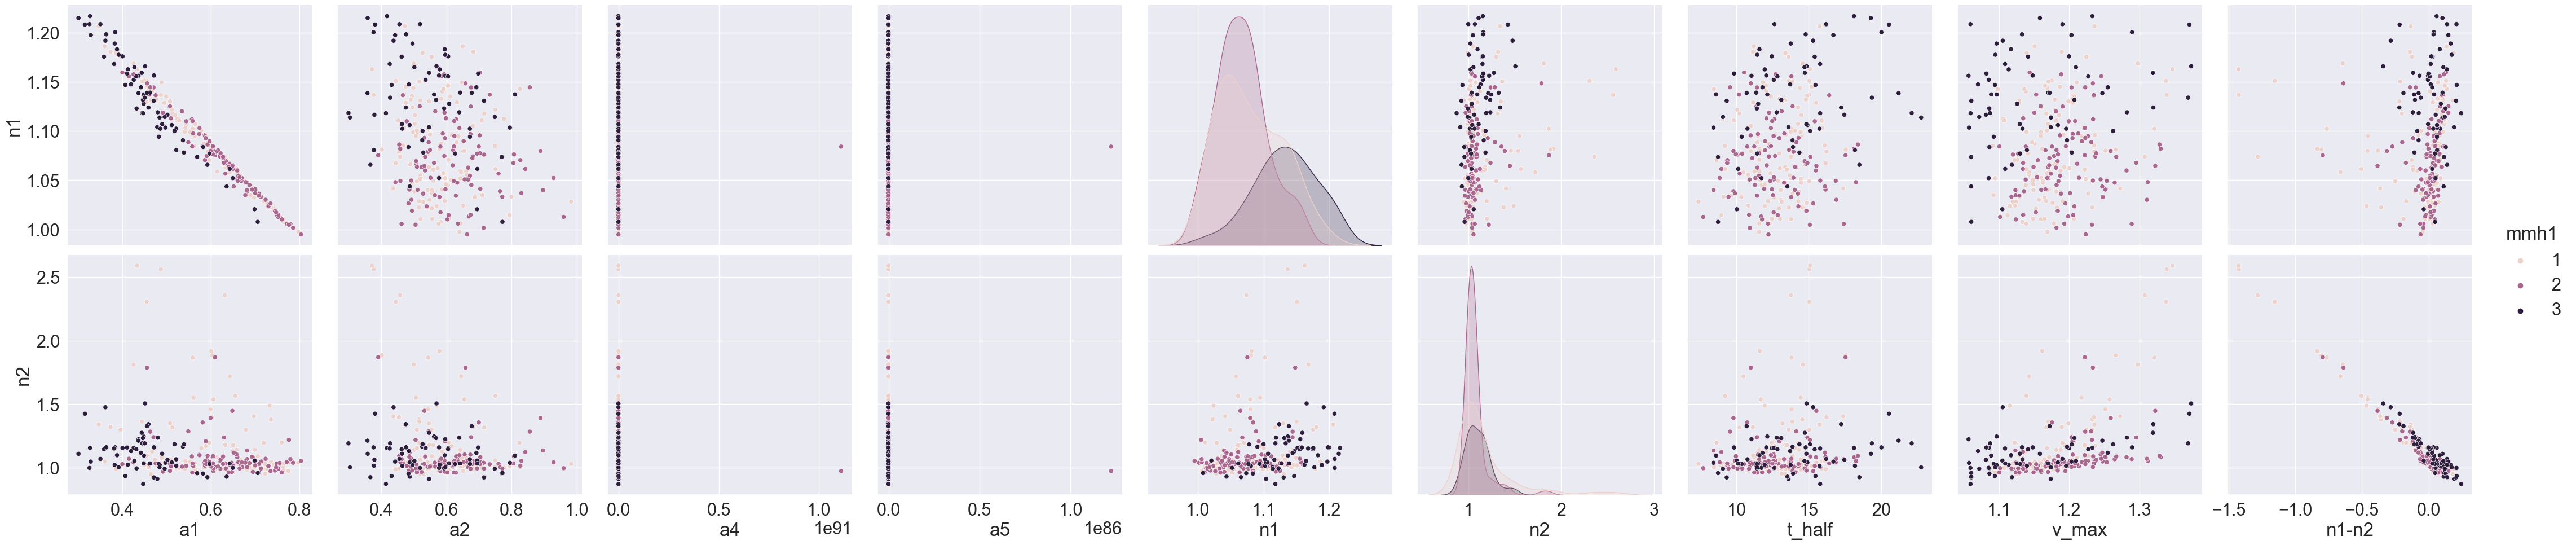

In [22]:
sns.pairplot(params, ## put the data frame here
                y_vars = ["n1","n2"], ## put a list of the desired vertical variables here
                x_vars = ["a1","a2","a4","a5","n1","n2","t_half","v_max","n1-n2"], ## put a list of the desired horizontal variables here
                height = 5,
                hue="mmh1")

plt.show()

In [12]:
##count the number of each mmh1 type
params['mmh1'].value_counts()

2    114
1    112
3     64
Name: mmh1, dtype: int64

In [13]:
params['a4_log'] = params['a4'].apply(np.log10)
params['a5_log'] = params['a5'].apply(np.log10)

In [14]:
params_trimmed = params[params['a4'] <100]
params_trimmed = params_trimmed[params_trimmed['a5'] <100]

In [15]:
params_trimmed.sample(5)

,a1,a2,a3,a4,a5,a6,a7,n1,n2,t_half,v_max,mmh1,n1-n2,a4_log,a5_log
4,0.436437,0.596691,1.844726,0.613271,0.278979,0.006094,0.003373,1.156088,1.224068,11.043067,1.056653,3,-0.067980,-0.212348,-0.554429
48,0.605778,0.654976,5.352706,2.866788,0.223957,0.010094,0.009393,1.079809,1.537714,11.683192,1.257685,1,-0.457905,0.457396,-0.649836
61,0.599249,0.888512,4.318099,2.464106,0.293104,0.028550,0.032017,1.079729,1.391760,9.794928,1.259143,2,-0.312031,0.391659,-0.532979
10,0.614127,0.660885,1.092163,0.941842,1.840926,0.005499,0.003719,1.058825,1.082813,11.248224,1.171717,1,-0.023987,-0.026022,0.265036
85,0.455459,0.658914,12.871163,0.798147,0.169105,0.025126,0.027982,1.148341,1.787271,10.996922,1.233818,2,-0.638930,-0.097917,-0.771844


In [16]:
params_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 0 to 63
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a1      143 non-null    float64
 1   a2      143 non-null    float64
 2   a3      143 non-null    float64
 3   a4      143 non-null    float64
 4   a5      143 non-null    float64
 5   a6      143 non-null    float64
 6   a7      143 non-null    float64
 7   n1      143 non-null    float64
 8   n2      143 non-null    float64
 9   t_half  143 non-null    float64
 10  v_max   143 non-null    float64
 11  mmh1    143 non-null    int32  
 12  n1-n2   143 non-null    float64
 13  a4_log  143 non-null    float64
 14  a5_log  143 non-null    float64
dtypes: float64(14), int32(1)
memory usage: 17.3 KB


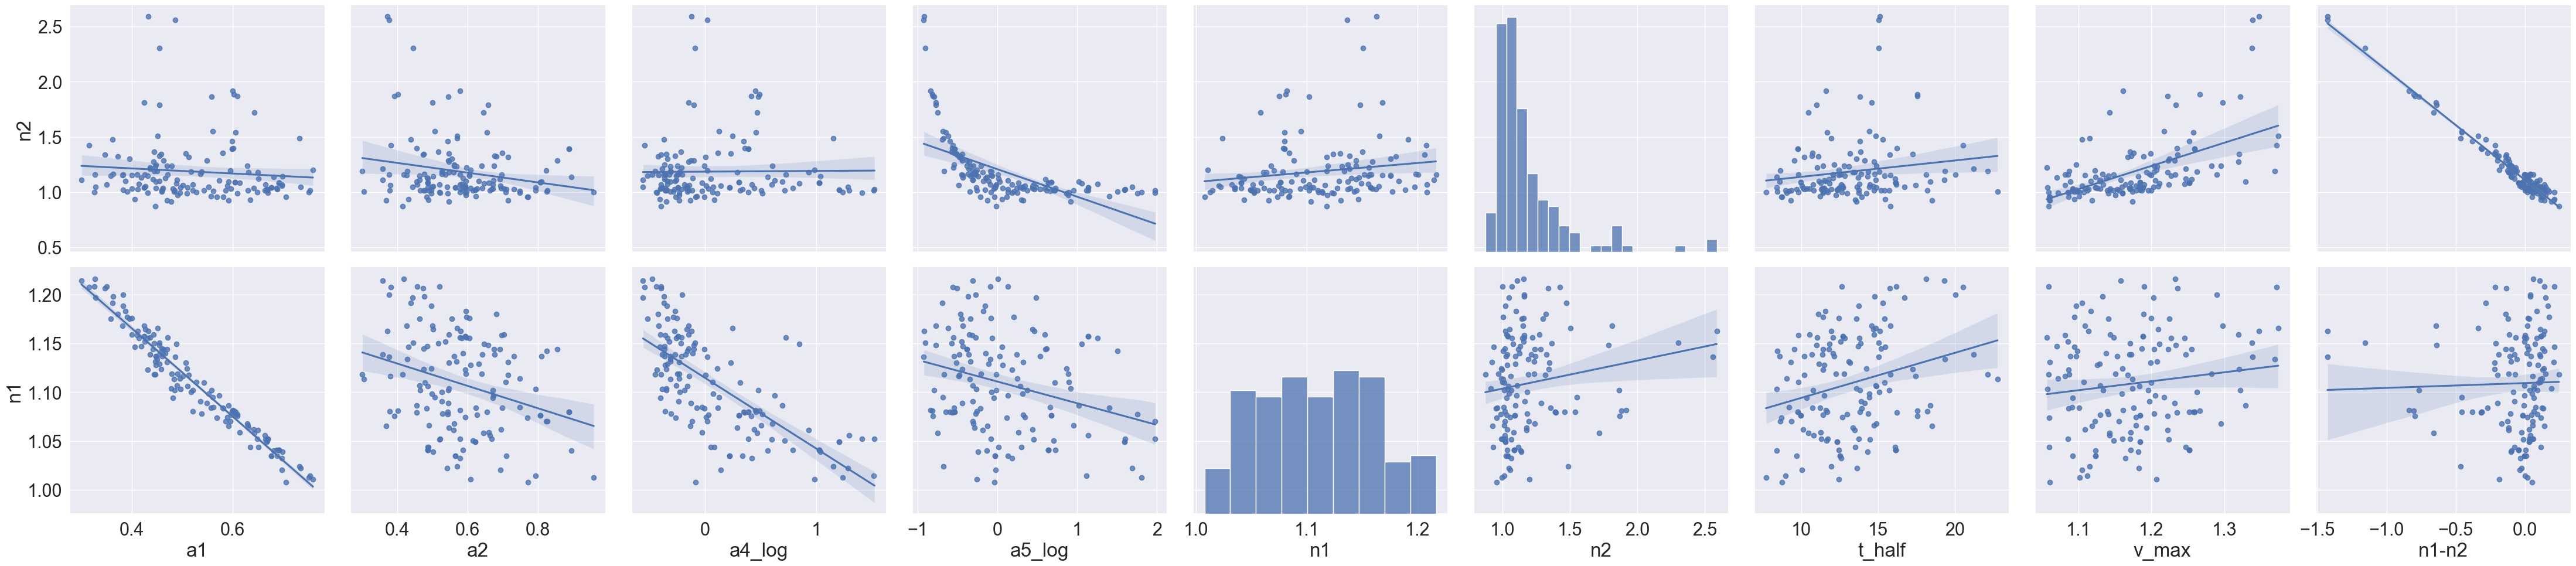

In [21]:
sns.pairplot(params_trimmed, ## put the data frame here
                y_vars = ["n2","n1"], ## put a list of the desired vertical variables here
                x_vars = ["a1","a2","a4_log","a5_log","n1","n2","t_half","v_max","n1-n2"], ## put a list of the desired horizontal variables here
                height = 5,
                kind="reg")

                #hue="mmh1", palette="colorblind",
                #markers=["o", "s", "D"])
sns.set(font_scale=2)
plt.show()